## [미니프로젝트] 서울시 공유자전거 '따릉이'의 수요 예측

### 여러분은 서울시 정책 연구원으로써 서울시 공유자전거인 '따릉이'의 수요와 날씨간 연관성을 분석하라는 미션을 부여받았습니다.

#### <font color="blue"> 데이터 분석의 주 목적은 가치있는 정보를 찾아내는것!! </font>

### ▣ 우리가 풀어야 하는 문제는 무엇인가요?

 - 기상상황이 따릉이 수요에 주는 영향을 분석해봅시다.

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


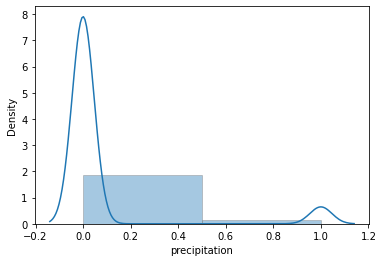

In [167]:
sns.distplot(data['precipitation'], bins = 2, hist_kws = dict(edgecolor='grey'))
plt.show()

## ▣ 데이터 소개
[기본 데이터]
* 학습데이터 : traindata.csv

## ▣ 데이터셋의 변수 소개
* date : 날짜
* hour : 시간
* temperature : 온도
* precipitation : 강우 여부, 비가 오지 않았으면 0, 비가 오면 1
* windspeed : 풍속(평균)
* humidity : 습도
* visibility : 시정(視程), 시계(視界)(특정 기상 상태에 따른 가시성을 의미)
* ozone : 오존 수치
* PM10 : 미세먼지 수치(머리카락 굵기의 1/5에서 1/7 크기의 미세먼지)
* PM2.5 : 초미세먼지 수치(머리카락 굵기의 1/20에서 1/30 크기의 미세먼지)
* count : 시간에 따른 따릉이 대여 수

### [과제1] 환경 설정
#### <span style="color: green"> 1) 라이브러리 불러오기 </span>

In [1]:
#EDA에 사용할 라이브러리를 import 하세요
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as spst

#### <span style="color: green"> 2) 활용할 데이터 불러오기 </span>

In [2]:
#이번 프로젝트에서 분석할 데이터를 불러오세요
data = pd.read_csv('traindata.csv')

In [3]:
data.head()

,date,hour,PM10,PM2.5,ozone,temperature,precipitation,windspeed,humidity,visibility,count
0,2021-04-01,1,42.0,21.0,0.002,13.1,0,1.4,49,2000,46
1,2021-04-01,2,41.0,21.0,0.003,12.4,0,2.1,53,2000,40
2,2021-04-01,3,30.0,13.0,0.023,13.1,0,3.4,43,2000,31
3,2021-04-01,4,27.0,12.0,0.028,13.0,0,3.1,44,2000,12
4,2021-04-01,5,29.0,14.0,0.008,13.0,0,2.9,44,2000,30


In [161]:
data.tail()

,date,hour,PM10,PM2.5,ozone,temperature,precipitation,windspeed,humidity,visibility,count
5822,2021-11-29,20,74.0,58.0,0.002,9.3,0,0.3,66,1193,273
5823,2021-11-29,21,65.0,56.0,0.002,8.4,0,2.0,70,1233,228
5824,2021-11-29,22,51.0,41.0,0.002,8.6,0,1.9,70,1250,215
5825,2021-11-29,23,43.0,35.0,0.001,8.2,0,2.1,71,1262,125
5826,2021-11-30,0,39.0,31.0,0.004,7.9,0,2.3,71,1483,95


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5827 entries, 0 to 5826
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           5827 non-null   object 
 1   hour           5827 non-null   int64  
 2   PM10           5725 non-null   float64
 3   PM2.5          5732 non-null   float64
 4   ozone          5699 non-null   float64
 5   temperature    5827 non-null   float64
 6   precipitation  5827 non-null   int64  
 7   windspeed      5827 non-null   float64
 8   humidity       5827 non-null   int64  
 9   visibility     5827 non-null   int64  
 10  count          5827 non-null   int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 500.9+ KB


### [과제2] 가설설정
#### '가설' 이란 단어를 생각해보면, 우리가 직접 가설을 만들어야 할것 같지만 통계에서 분석기법별 귀무가설/대립가설은 정해져있습니다.
- 귀무가설은 차이가 없다, 연관성이 없다, 효과가 없다.
- 대립가설은 차이가 있다, 연관성이 있다, 효과가 있다. 라고 간단하게 이해하시면 좋습니다.

#### 간단한 예로, 온도와 따릉이 대여량간 가설을 수립 해본다면

    - 귀무가설 : 온도와 따릉이 간에는 연관성이 없다.
    - 대립가설 : 온도와 따릉이 간에는 연관성이 있다.

로 가설이 자연스레 수립 됩니다.



---


#### <span style="color: green"> 'precipitation' 변수를 포함하여, 최소 5개 이상의 Feature와 따릉이 대여량 간 가설을 수립해주세요. </span>

##### Guide : Target은 따릉이 대여량 입니다.

### [과제3] 단변량 분석

단변량 분석은 데이터분석의 매우 기초적인 분석기법으로, 독립적인 개별 변수가 가지고있는 특성들을 이해하는 과정입니다.

<span style="color: green"> 개별 변수에 대해 아래 사항들을 분석해보세요. </span>

1. 변수가 내포하고 있는 의미
2. 변수가 수치형인지, 범주형인지
3. 결측치 존재 여부 및 조치 방안
4. 기초 통계량 확인
5. 데이터 분포 확인
6. 위 정보로부터 파악한 내용 정리
7. 추가 분석사항 도출

### Feature1 : hour

1. 변수가 내포하고 있는 의미

- 변수의 의미를 한번 짚고 넘어갑시다.
hour 변수는 어떤 의미를 가지고 있나요?

#### 시간을 의미

2. 변수가 수치형인지 범주형인지


In [5]:
#변수의 자료형을 확인해보세요.
data['hour']

0        1
1        2
2        3
3        4
4        5
        ..
5822    20
5823    21
5824    22
5825    23
5826     0
Name: hour, Length: 5827, dtype: int64

3. 변수의 결측치 존재 여부 및 조치방안

In [6]:
#변수의 결측치 존재 여부를 확인하고, 만약 결측치가 존재하면 어떻게 처리할지 고민해보세요. 
data['hour'].isna().sum()

0

4. 변수의 기초 통계량 확인

In [7]:
#변수의 기초 통계량을 확인해보세요
data['hour'].describe()

count    5827.000000
mean       11.506607
std         6.921963
min         0.000000
25%         6.000000
50%        12.000000
75%        18.000000
max        23.000000
Name: hour, dtype: float64

5. 변수의 분포 확인

In [8]:
data['hour'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23,  0], dtype=int64)

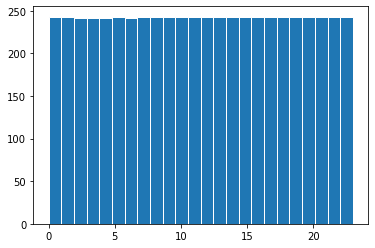

In [9]:
plt.hist(data['hour'], bins = 24, edgecolor = 'white')
plt.show()

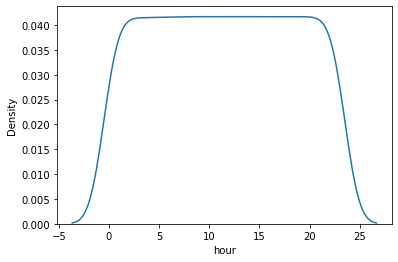

In [10]:
#변수의 분포를 시각화 라이브러리를 활용해 확인해보세요.
sns.kdeplot(data['hour'])
plt.show()

6. 위 정보로 부터 파악한 내용 정리

- 각 시간별로 데이터가 균일하게 분포되어 있음을 알 수 있음.
- 데이터 불균형이 일어나지 않음.

7. 추가 분석사항 도출

In [11]:
#추가로 분석을 원하는 부분이 있다면 분석후 정리해보세요.

### Feature2 : temperature

1. 변수가 내포하고 있는 의미
- 변수의 의미를 한번 짚고 넘어갑시다. 여러분이 생각하는 이 변수의 의미를 작성해보세요.

#### 온도. Celcius단위를 활용

- 물이 끓는점을 100℃, 얼음이 녹는점을 0℃로 하여 이 사이를 100등분한 온도 눈금. 

2. 변수가 수치형인지 범주형인지


In [12]:
#변수의 자료형을 확인해보세요.
data['temperature']

0       13.1
1       12.4
2       13.1
3       13.0
4       13.0
        ... 
5822     9.3
5823     8.4
5824     8.6
5825     8.2
5826     7.9
Name: temperature, Length: 5827, dtype: float64

3. 변수의 결측치 존재 여부 및 조치방안

In [13]:
#변수의 결측치 존재 여부를 확인하고, 만약 결측치가 존재하면 어떻게 처리할지 고민해보세요. 
data['temperature'].isna().sum()

0

4. 변수의 기초 통계량 확인

In [14]:
#변수의 기초 통계량을 확인해보세요
data['temperature'].describe()

count    5827.000000
mean       19.376798
std         7.501572
min        -3.500000
25%        14.100000
50%        20.400000
75%        24.900000
max        36.300000
Name: temperature, dtype: float64

5. 변수의 분포 확인

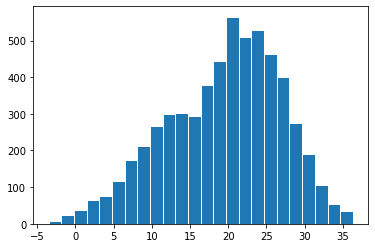

In [15]:
#변수의 분포를 시각화 라이브러리를 활용해 확인해보세요.
plt.hist(data['temperature'], bins = 24, edgecolor = 'white')
plt.show()

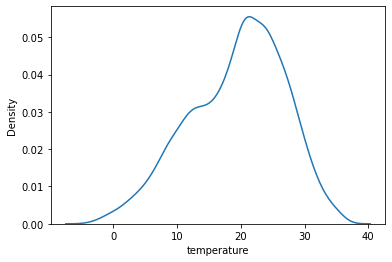

In [16]:
sns.kdeplot(data['temperature'])
plt.show()

6. 위 정보로 부터 파악한 내용 정리

- 평균이 19.37인데 비해 가장 많은 빈도를 보이는 온도는 20~25도 부근이다.

7. 추가 분석사항 도출

- 온도가 아주 낮거나 아주 높을 때 대여량이 궁금
- 특히 온도가 높아질수록 대여량이 급격하게 줄어드는지? (가설)

- 온도와 습도의 상관관계가 궁금

In [130]:
spst.pearsonr(data['temperature'], data['humidity'])

(-0.09216232432104918, 1.8061337339784914e-12)

### Feature3 : precipitation

1. 변수가 내포하고 있는 의미
- 변수의 의미를 한번 짚고 넘어갑시다. 여러분이 생각하는 이 변수의 의미를 작성해보세요.

#### 강우 여부. 비가 오지 않았으면 0, 비가 왔으면 1

2. 변수가 수치형인지 범주형인지


In [17]:
data['precipitation']

0       0
1       0
2       0
3       0
4       0
       ..
5822    0
5823    0
5824    0
5825    0
5826    0
Name: precipitation, Length: 5827, dtype: int64

3. 변수의 결측치 존재 여부 및 조치방안

In [18]:
data['precipitation'].isna().sum()

0

4. 변수의 기초 통계량 확인

In [19]:
data['precipitation'].describe()

count    5827.000000
mean        0.075511
std         0.264236
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: precipitation, dtype: float64

5. 변수의 분포 확인

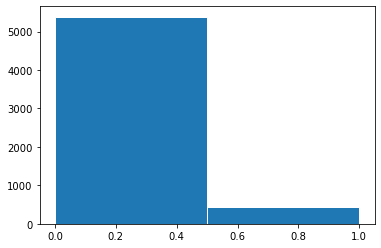

In [81]:
plt.hist(data['precipitation'], bins = 2, edgecolor = 'white')
plt.show()

6. 위 정보로 부터 파악한 내용 정리

- 보통은 비가 오지 않음. 비가 온 쪽의 데이터가 부족한 현상이 발생

7. 추가 분석사항 도출

In [ ]:
# preperation이 1일때 대여량을 확인

### Feature4 : windspeed

1. 변수가 내포하고 있는 의미
- 변수의 의미를 한번 짚고 넘어갑시다. 여러분이 생각하는 이 변수의 의미를 작성해보세요.

풍속 (평균). 
- https://m.blog.naver.com/dhpyun/220697406626


- 보퍼트 풍력 계급 13단계
- 0등급 (0~0.2) : 연기가 위로 똑바로 올라가는 상태.
- 1등급 (0.3~1.5) : 연기가 날리나 바람개비에는 감지가 안됨.
- 2등급 (1.6~3.3) : 바람이 얼굴에 감촉. 나뭇잎이 흔들리며 바람개비에 감지.
- 3등급 (3.4~5.4) : 나뭇잎과 가는 가지가 쉴새없이 흔들림. 깃발이 가볍게 휘날림.
- 4등급 (5.5~7.9) : 먼지가 일고 종이조각이 날리며 작은 나뭇가지가 흔들림.
- 5등급 (8~10.7) : 작은 나무 전체가 흔들리고 강물에 잔물결.

2. 변수가 수치형인지 범주형인지


In [21]:
data['windspeed']

0       1.4
1       2.1
2       3.4
3       3.1
4       2.9
       ... 
5822    0.3
5823    2.0
5824    1.9
5825    2.1
5826    2.3
Name: windspeed, Length: 5827, dtype: float64

3. 변수의 결측치 존재 여부 및 조치방안

In [22]:
data['windspeed'].isna().sum()

0

4. 변수의 기초 통계량 확인

In [23]:
data['windspeed'].describe()

count    5827.000000
mean        2.237601
std         1.054516
min         0.000000
25%         1.500000
50%         2.200000
75%         2.800000
max         8.300000
Name: windspeed, dtype: float64

5. 변수의 분포 확인

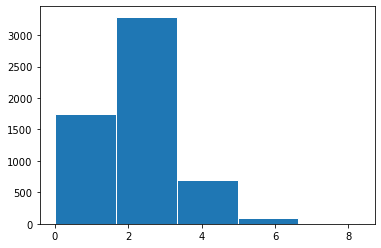

In [24]:
plt.hist(data['windspeed'], bins = 5, edgecolor = 'white')
plt.show()

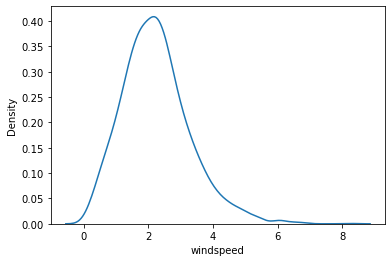

In [25]:
sns.kdeplot(data['windspeed'])
plt.show()

6. 위 정보로 부터 파악한 내용 정리

- 풍속이 2일때 (적당한 바람이 불때) 가 대체적으로 많음.

7. 추가 분석사항 도출

### Feature5 : humidity

1. 변수가 내포하고 있는 의미
- 변수의 의미를 한번 짚고 넘어갑시다. 여러분이 생각하는 이 변수의 의미를 작성해보세요.

#### 습도를 의미.
- http://www.153weather.com/past_climate02.html


- 공기 중에 포함되어 있는 수증기의 비율
- 비율이기 때문에 최대 100%


- 대한민국의 평균 상대 습도는 67%
- 4월의 평균 습도는 59%, 7월의 평균 습도는 80%
- 여름 평균 습도는 76%
- 봄과 겨울 평균 습도는 63%, 62%

2. 변수가 수치형인지 범주형인지


In [26]:
data['humidity']

0       49
1       53
2       43
3       44
4       44
        ..
5822    66
5823    70
5824    70
5825    71
5826    71
Name: humidity, Length: 5827, dtype: int64

3. 변수의 결측치 존재 여부 및 조치방안

In [27]:
data['humidity'].isna().sum()

0

4. 변수의 기초 통계량 확인

In [28]:
data['humidity'].describe()

count    5827.000000
mean       68.608718
std        17.277266
min        19.000000
25%        56.000000
50%        70.000000
75%        82.000000
max       100.000000
Name: humidity, dtype: float64

5. 변수의 분포 확인

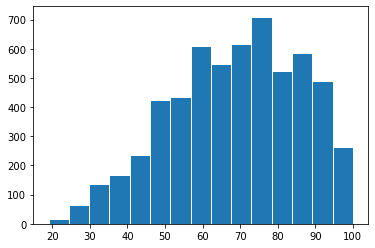

In [30]:
plt.hist(data['humidity'], bins = 15, edgecolor = 'white')
plt.show()

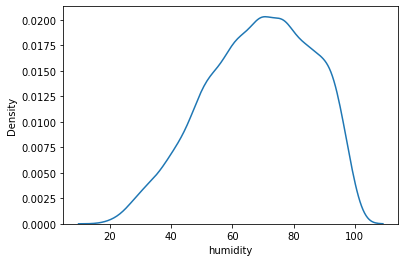

In [31]:
sns.kdeplot(data['humidity'])
plt.show()

6. 위 정보로 부터 파악한 내용 정리

- 서울의 습도 편차는 59 ~ 80.
    - 단, 위에서 조사한 것은 평균 상대 습도. (df의 기준과 일치하는지는 미지수)

7. 추가 분석사항 도출

- 대한민국의 평균 습도인 67%를 넘어갔을 때 따릉이 대여량의 관계가 궁금

In [151]:
hum = data.loc[data['humidity'] >= 67]
hum

,date,hour,PM10,PM2.5,ozone,temperature,precipitation,windspeed,humidity,visibility,count
57,2021-04-03,10,49.0,18.0,0.026,16.8,1,1.9,79,521,5
58,2021-04-03,11,45.0,15.0,0.018,15.8,1,2.2,89,206,1
59,2021-04-03,12,40.0,13.0,0.021,14.9,1,2.9,94,165,2
60,2021-04-03,13,20.0,9.0,0.021,14.8,1,2.1,94,386,2
61,2021-04-03,14,17.0,10.0,0.017,14.5,1,3.7,96,285,3
...,...,...,...,...,...,...,...,...,...,...,...
5809,2021-11-29,7,40.0,30.0,0.002,2.9,0,2.1,68,1910,157
5823,2021-11-29,21,65.0,56.0,0.002,8.4,0,2.0,70,1233,228
5824,2021-11-29,22,51.0,41.0,0.002,8.6,0,1.9,70,1250,215
5825,2021-11-29,23,43.0,35.0,0.001,8.2,0,2.1,71,1262,125


In [153]:
spst.pearsonr(hum['humidity'], hum['count'])

(-0.37728824142275885, 4.976014036973886e-112)

### Feature6 : visibility

1. 변수가 내포하고 있는 의미
- 변수의 의미를 한번 짚고 넘어갑시다. 여러분이 생각하는 이 변수의 의미를 작성해보세요.

#### 시정, 시계 (특정 기상 상태에 따른 가시성을 의미)

- 물체나 빛이 분명하게 보이는 최대 거리 (가시거리)
- 공기의 혼탁한 정도.
- 5km 미만의 시정은 m단위를 사용한다.

2. 변수가 수치형인지 범주형인지


In [33]:
data['visibility']

0       2000
1       2000
2       2000
3       2000
4       2000
        ... 
5822    1193
5823    1233
5824    1250
5825    1262
5826    1483
Name: visibility, Length: 5827, dtype: int64

3. 변수의 결측치 존재 여부 및 조치방안

In [34]:
data['visibility'].isna().sum()

0

4. 변수의 기초 통계량 확인

In [35]:
data['visibility'].describe()

count    5827.000000
mean     1758.438648
std       490.969394
min        60.000000
25%      1935.500000
50%      2000.000000
75%      2000.000000
max      2000.000000
Name: visibility, dtype: float64

5. 변수의 분포 확인

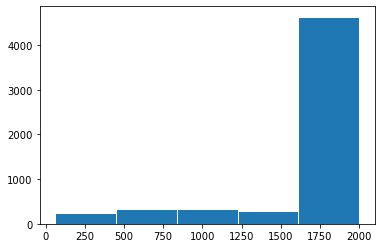

In [38]:
plt.hist(data['visibility'], bins = 5, edgecolor = 'white')
plt.show()

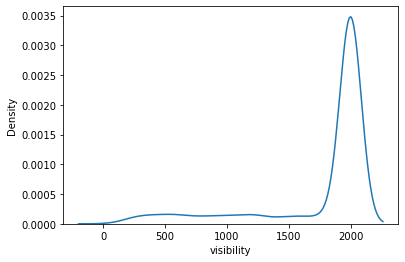

In [37]:
sns.kdeplot(data['visibility'])
plt.show()

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


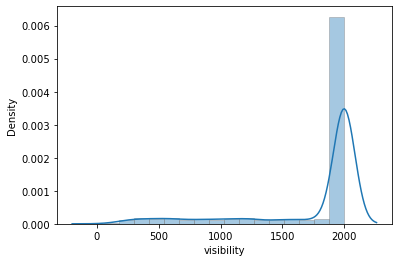

In [162]:
sns.distplot(data['visibility'], bins = 16, hist_kws = dict(edgecolor='grey'))
plt.show()

6. 위 정보로 부터 파악한 내용 정리

- 대체로 시정거리가 2000m임을 볼 수 있음.

7. 추가 분석사항 도출

- 월별 가시거리 여부가 궁금
- 미세먼지/초미세먼지와 시정간 관계는?

### Feature7 : ozone

1. 변수가 내포하고 있는 의미
- 변수의 의미를 한번 짚고 넘어갑시다. 여러분이 생각하는 이 변수의 의미를 작성해보세요.

#### 오존 수치

- https://science.ytn.co.kr/program/program_view.php?s_mcd=0082&s_hcd=0024&key=202007141654519393

- 서울의 오존 일평균은 0.031
- 기온 25도 이상, 상대습도 75% 이하, 풍속, 초속 4m 이하의 조건이면 급격히 늘어남.

2. 변수가 수치형인지 범주형인지

In [39]:
data['ozone']

0       0.002
1       0.003
2       0.023
3       0.028
4       0.008
        ...  
5822    0.002
5823    0.002
5824    0.002
5825    0.001
5826    0.004
Name: ozone, Length: 5827, dtype: float64

3. 변수의 결측치 존재 여부 및 조치방안

In [83]:
data.shape

(5827, 11)

In [82]:
# 결측치가 존재
data['ozone'].isna().sum()

128

In [84]:
# 데이터 5827행 중 128개를 삭제할 수는 없음.
## 데이터가 오른쪽으로 치우쳐진 관계로 평균값 대체도 어렵다 판단.
### interpolate  사용
data['ozone'] = data['ozone'].interpolate(method='linear') # default는 linear
data['ozone'].isnull().sum()

0

4. 변수의 기초 통계량 확인

In [85]:
data['ozone'].describe()

count    5827.000000
mean        0.031634
std         0.018263
min         0.001000
25%         0.019000
50%         0.030000
75%         0.041000
max         0.137000
Name: ozone, dtype: float64

5. 변수의 분포 확인

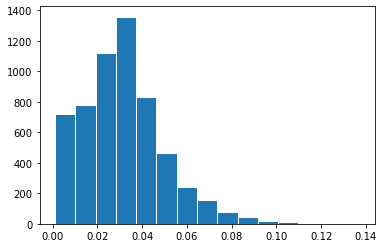

In [86]:
plt.hist(data['ozone'], bins = 15, edgecolor = 'white')
plt.show()

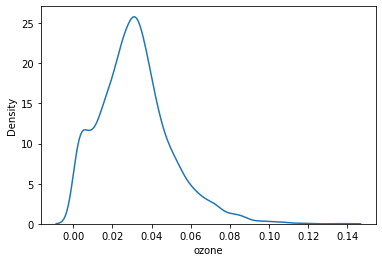

In [87]:
sns.kdeplot(data['ozone'])
plt.show()

6. 위 정보로 부터 파악한 내용 정리

- 서울의 오존 평균은 0.031. 평균적으로 크게 이 수치에서 벗어나지 않은 것 같음.

7. 추가 분석사항 도출

In [154]:
# 오존과 기온의 상관관계
spst.pearsonr(data['temperature'], data['ozone'])

(0.5369351933122645, 0.0)

In [155]:
# 오존과 습도의 상관관계
spst.pearsonr(data['humidity'], data['ozone'])

(-0.40709994117487225, 1.6375691120715833e-231)

In [156]:
# 오존과 풍속의 상관관계
spst.pearsonr(data['windspeed'], data['ozone'])

(0.34040462536431815, 5.097253142864444e-158)

### Feature8 : PM10

1. 변수가 내포하고 있는 의미
- 변수의 의미를 한번 짚고 넘어갑시다. 여러분이 생각하는 이 변수의 의미를 작성해보세요.

#### 미세먼지 수치 (머리카락 굵기의 1/5 ~ 1/7 크기의 미세먼지)

- 서울 평균 미세먼지 수치는 35 (마포구는 31)
- 미세먼지는 입자의 크기가 10㎛ (밀리그램) 이하인 먼지.
- 초미세먼지는 입자의 크기가 2.5㎛ 이하인 먼지.

2. 변수가 수치형인지 범주형인지


In [88]:
data['PM10']

0       42.0
1       41.0
2       30.0
3       27.0
4       29.0
        ... 
5822    74.0
5823    65.0
5824    51.0
5825    43.0
5826    39.0
Name: PM10, Length: 5827, dtype: float64

3. 변수의 결측치 존재 여부 및 조치방안

In [89]:
data['PM10'].isna().sum()

102

In [90]:
# 역시 interpolate 이용
data['PM10'] = data['PM10'].interpolate(method='linear') # default는 linear
data['PM10'].isnull().sum()

0

4. 변수의 기초 통계량 확인

In [91]:
data['PM10'].describe()

count    5827.000000
mean       31.833705
std        42.650908
min         3.000000
25%        16.000000
50%        25.000000
75%        37.000000
max       827.000000
Name: PM10, dtype: float64

5. 변수의 분포 확인

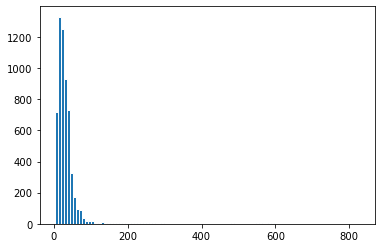

In [102]:
plt.hist(data['PM10'], bins = 100, edgecolor = 'white')
plt.show()

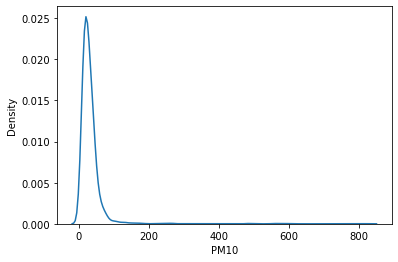

In [93]:
sns.kdeplot(data['PM10'])
plt.show()

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


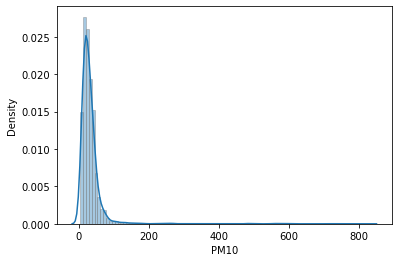

In [164]:
sns.distplot(data['PM10'], bins = 100, hist_kws = dict(edgecolor='grey'))
plt.show()

6. 위 정보로 부터 파악한 내용 정리

- 827이라는 값이 이상값은 아닐까?
- 몇백대의 값이 꽤 많음.

In [149]:
len(data.loc[data['PM10'] > 200])

44

In [145]:
data.loc[data['PM10'] > 200]

,date,hour,PM10,PM2.5,ozone,temperature,precipitation,windspeed,humidity,visibility,count
375,2021-04-16,16,269.0,62.0,0.037,14.7,0,4.1,61,1298,332
376,2021-04-16,17,296.0,57.0,0.034,14.6,0,3.9,46,1003,406
873,2021-05-07,12,309.0,47.0,0.029,15.2,0,5.2,62,955,184
874,2021-05-07,13,485.0,78.0,0.028,16.5,0,5.9,50,616,181
875,2021-05-07,14,562.0,88.0,0.029,16.6,0,6.1,50,490,207
876,2021-05-07,15,555.0,88.0,0.030,16.9,0,4.4,53,482,208
877,2021-05-07,16,563.0,89.0,0.027,16.8,0,5.0,55,499,265
878,2021-05-07,17,594.0,93.0,0.024,16.3,0,4.8,57,471,346
879,2021-05-07,18,606.0,94.0,0.020,15.4,0,3.9,63,444,537
880,2021-05-07,19,586.0,87.0,0.016,13.7,0,6.0,70,419,303


7. 추가 분석사항 도출

- 미세먼지 수치가 높을때는 주로 4월에서 5월임을 볼 수 있음
- 봄철 미세먼지 수치가 높을 때인가?

### Feature9 : PM2.5

1. 변수가 내포하고 있는 의미
- 변수의 의미를 한번 짚고 넘어갑시다. 여러분이 생각하는 이 변수의 의미를 작성해보세요.

#### 초미세먼지 수치 (머리카락 굵기의 1/20 ~ 1/30 크기의 미세먼지)

- 서울 평균 초미세먼지 수치는 19. (마포구는 18)
- 미세먼지는 입자의 크기가 10㎛ (밀리그램) 이하인 먼지.
- 초미세먼지는 입자의 크기가 2.5㎛ 이하인 먼지.

2. 변수가 수치형인지 범주형인지


In [56]:
data['PM2.5']

0       21.0
1       21.0
2       13.0
3       12.0
4       14.0
        ... 
5822    58.0
5823    56.0
5824    41.0
5825    35.0
5826    31.0
Name: PM2.5, Length: 5827, dtype: float64

3. 변수의 결측치 존재 여부 및 조치방안

In [53]:
data['PM2.5'].isna().sum()

95

In [94]:
# 역시 interpolate 이용
data['PM2.5'] = data['PM2.5'].interpolate(method='linear') # default는 linear
data['PM2.5'].isnull().sum()

0

4. 변수의 기초 통계량 확인

In [95]:
data['PM2.5'].describe()

count    5827.000000
mean       15.633774
std        13.791083
min         1.000000
25%         7.000000
50%        13.000000
75%        20.000000
max       125.000000
Name: PM2.5, dtype: float64

5. 변수의 분포 확인

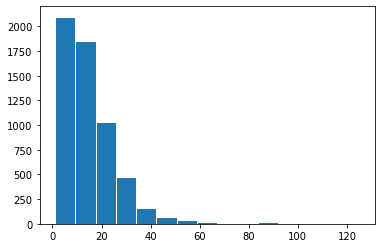

In [96]:
plt.hist(data['PM2.5'], bins = 15, edgecolor = 'white')
plt.show()

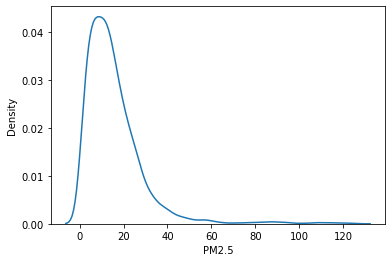

In [97]:
sns.kdeplot(data['PM2.5'])
plt.show()

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


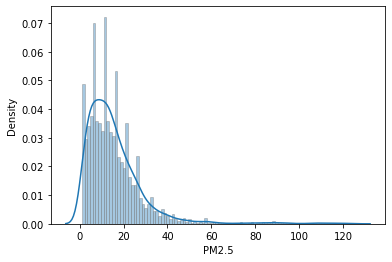

In [165]:
sns.distplot(data['PM2.5'], bins = 100, hist_kws = dict(edgecolor='grey'))
plt.show()

6. 위 정보로 부터 파악한 내용 정리

7. 추가 분석사항 도출

- 미세먼지가 높으면 초미세먼지가 높은지 궁금

In [106]:
spst.pearsonr(data['PM10'], data['PM2.5'])

(0.6841669416635519, 0.0)

- 미세먼지/초미세먼지와 가시거리의 관계가 궁금

In [127]:
spst.pearsonr(data['PM10'], data['visibility'])

(-0.2867454209135002, 1.079055454795737e-110)

In [129]:
spst.pearsonr(data['PM2.5'], data['visibility'])

(-0.4305653781192581, 1.074933888679831e-261)

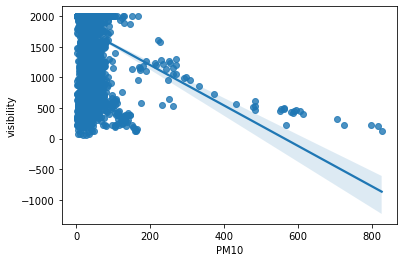

In [158]:
sns.regplot(x = 'PM10', y = 'visibility', data = data)
plt.show()

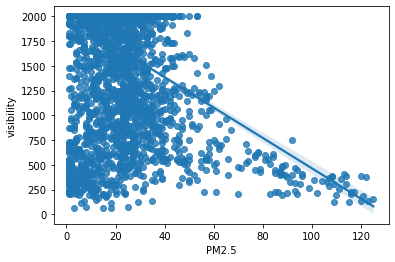

In [159]:
sns.regplot(x = 'PM2.5', y = 'visibility', data = data)
plt.show()

### Count (Target)

1. 변수가 내포하고 있는 의미
- 변수의 의미를 한번 짚고 넘어갑시다. 여러분이 생각하는 이 변수의 의미를 작성해보세요.

#### 시간에 따른 따릉이 대여 수

2. 변수가 수치형인지 범주형인지


In [62]:
data['count']

0        46
1        40
2        31
3        12
4        30
       ... 
5822    273
5823    228
5824    215
5825    125
5826     95
Name: count, Length: 5827, dtype: int64

3. 변수의 결측치 존재 여부 및 조치방안

In [63]:
data['count'].isna().sum()

0

4. 변수의 기초 통계량 확인

In [64]:
data['count'].describe()

count    5827.000000
mean      215.117899
std       185.972900
min         1.000000
25%        53.000000
50%       186.000000
75%       315.000000
max      1746.000000
Name: count, dtype: float64

5. 변수의 분포 확인

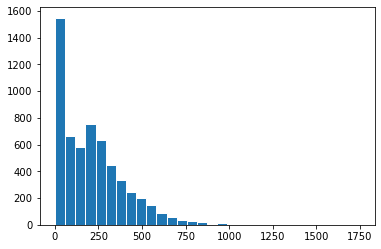

In [68]:
plt.hist(data['count'], bins = 30, edgecolor = 'white')
plt.show()

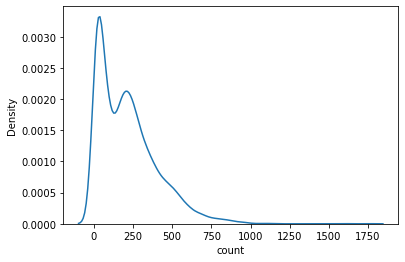

In [67]:
sns.kdeplot(data['count'])
plt.show()

6. 위 정보로 부터 파악한 내용 정리

7. 추가 분석사항 도출

## 단변량 분석 후 가설

- 가설 1 : 1시간전 강우 여부와 따릉이간에는 연관성이 없다.
    - 대립가설 : 1시간전 강우 여부와 따릉이 대여량 간에는 연관성이 있다.


- 가설 2 : 미세먼지수치/초미세먼지수치와 따릉이간에는 연관성이 없다 / 있다
    - 미세먼지수치 > 초미세먼지수치간 관계가 있을 것이다.
 
 
- 가설 3: 온도와 따릉이간에는 연관성이 없다 / 있다
    - 특히 온도가 높아질수록 대여량이 줄어들 것이다 (음의 상관관계)
    - 단, 온도가 아주 낮으면 대여량이 다시 줄어들 것이다?
    
    
- 가설 4: 풍속과 따릉이간에는 연관성이 없다 / 있다


- 가설 5: 습도와 따릉이간에는 연관성이 없다 / 있다
    - 대한민국의 평균 습도인 67%를 넘어갔을 때 대여량이 궁금.
    
    
- 가설 6: 가시거리와 따릉이간에는 연관성이 없다 / 있다
    - 사실, 큰 차이 없을 것 같음.
    
    
- 가설 7: 오존과 따릉이간에는 연관성이 없다 / 있다
    - 사람들이 오존 수치를 체감할 수 있나?

### 4.이변량 분석 
* 자료의 종류에 맞게 X --> Y 에 대해서 그래프(시각화)와 가설검정(수치화)를 수행하고 결과를 평가합니다.
* 가설검정시 다음의 항목을 참조하여 수행합니다.
    * 적절한 유의수준
    * 숫자 --> 숫자 : 상관분석
    * 범주 --> 범주 : 카이제곱검정
    * 범주 --> 숫자 : t검정, 분산분석
    * 숫자 --> 범주 : 로지스틱 회귀모형을 통해, 회귀계수의 P.value로 검정을 수행합니다.

In [107]:
target = data['count']

#### (1) 범주형 Feature --> 숫자형 Y (따릉이 대여 Count)

<font color="green">* 모든 범주형 Feature에 대해서 Y와 비교하여 차트를 그리고 수치화 하시오.</font>


        1. 시각화 : 그래프를 활용한 데이터 분석
        2. 수치화 : t-test, anova
        3. 관계 평가 (가설 검정)

1. 강수 여부와 따릉이 대여량간 이변량 분석

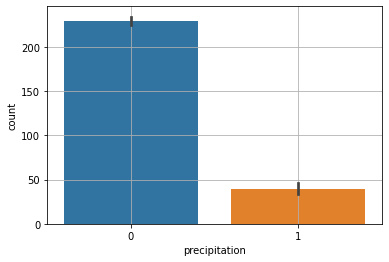

In [108]:
# sns.barplot는 두 범주의 평균 비교 sns.barplot
sns.barplot(x='precipitation', y=target, data=data) # 평균을 비교할 수 있는 barplot
plt.grid()
plt.show()

In [109]:
spst.ttest_ind(data['precipitation'], target)

Ttest_indResult(statistic=-88.26661714227939, pvalue=0.0)

#### (2) 숫자형 Feature --> 숫자형 Y (따릉이 대여 Count)

<font color="green">* 모든 숫자형 Feature에 대해서 Y와 비교하여 차트를 그리고 수치화 하시오.  </font>


        1. 시각화 : 그래프를 활용한 데이터 분석
        2. 수치화 : 상관분석
        3. 관계 평가 (가설 검정)

2. 시간대별 데이터와 따릉이 대여량간 분석

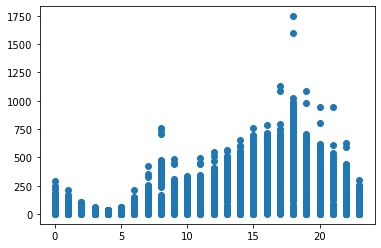

In [110]:
plt.scatter(data['hour'], target)
plt.show()

In [111]:
spst.pearsonr(data['hour'], target)

(0.5864350283919393, 0.0)

- 전체적으로 저녁 > 아침.
- 저녁 시간대 중에서는 퇴근 시간인 16시에 가장 대여량이 높음.
- 아침 시간대 중에서는 출근 시간인 08시에 가장 대여량이 높음.

3. 온도 데이터와 따릉이 대여량간 분석

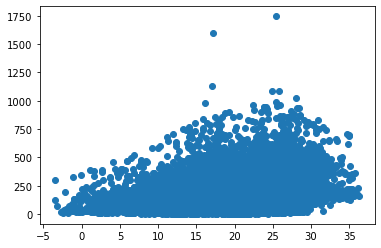

In [112]:
plt.scatter(data['temperature'], target)
plt.show()

In [113]:
spst.pearsonr(data['temperature'], target)

(0.2771692363089791, 2.9405165551619465e-103)

- 영하나 30도를 넘은 극한의 상황에서도 수요가 존재.
- 더울때보단 추울때 수요가 더 없음.

4. 풍속 데이터와 따릉이 대여량간 분석

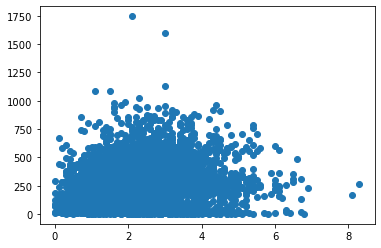

In [114]:
plt.scatter(data['windspeed'], target)
plt.show()

In [115]:
spst.pearsonr(data['windspeed'], target)

(0.22372189900674888, 5.2433176782994606e-67)

- 바람 세기가 7 이상이면 수요가 거의 없음.
- 바람이 아주 세지만 않으면 항상 수요가 많다고 볼 수 있음.

5. 습도 데이터와 따릉이 대여량간 분석

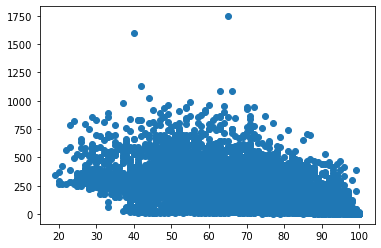

In [116]:
plt.scatter(data['humidity'], target)
plt.show()

In [117]:
spst.pearsonr(data['humidity'], target)

(-0.4789554265904137, 0.0)

6. 시정 데이터와 따릉이 대여량간 분석

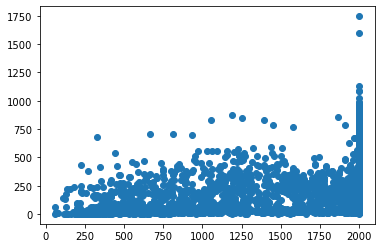

In [118]:
plt.scatter(data['visibility'], target)
plt.show()

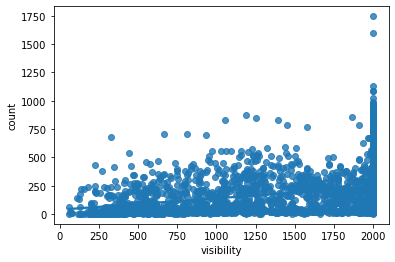

In [157]:
sns.regplot(x = 'visibility', y = target, data = data)
plt.show()

In [119]:
spst.pearsonr(data['visibility'], target)

(0.26582778327488765, 7.876003852900128e-95)

- 시정거리가 2000m일때 확 늘어나는 것 이외에 수요는 꾸준함.
- 250 ~ 750 구간보다 1000 ~ 1500구간이 더 높긴 함.

7. 오존 데이터와 따릉이 대여량간 분석

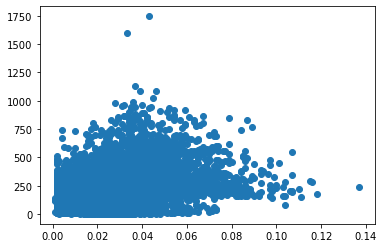

In [120]:
plt.scatter(data['ozone'], target)
plt.show()

In [121]:
spst.pearsonr(data['ozone'], target)

(0.3179918655691485, 4.721727543204258e-137)

8. 미세먼지 농도 데이터와 따릉이 대여량간 분석

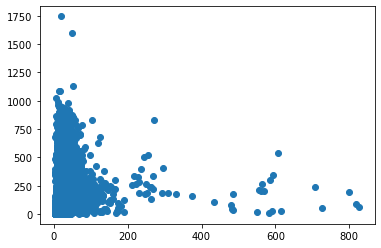

In [122]:
plt.scatter(data['PM10'], target)
plt.show()

In [123]:
spst.pearsonr(data['PM10'], target)

(0.02753552779908241, 0.03556499262323277)

9. 초미세먼지 농도 데이터와 따릉이 대여량간 분석

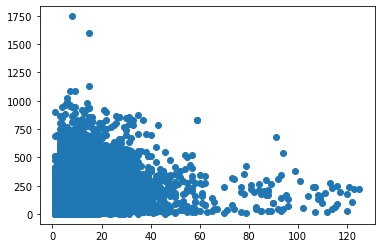

In [124]:
plt.scatter(data['PM2.5'], target)
plt.show()

In [125]:
spst.pearsonr(data['PM2.5'], target)

(0.034833977797175945, 0.007830765224579699)

### 5. 가설 검정

#### <font color='green'>1. 강한 관계의 변수 (대립가설 채택)</font>

- precipitation (강우) (t검정 -88.266, 0.0)
- hour (시간) (0.586, 0.0)
- humidity (습도) (-0.479, 0.0)

#### <font color='green'>2. 약한 관계의 변수</font>


- temperature (온도) (0.277, 0.0)
- windspeed (풍속) (0.224, 0.0)
- visibility (시정) (0.266, 0.0)
- ozone (오존) (0.318, 0.0)

#### <font color='green'>3. 관계 없는 변수 (귀무가설 채택)</font>


- PM10 (미세먼지) (0.028. 0.036)
- PM2.5 (초미세먼지) (0.035, 0.008)

### 6. Insight 도출

- **가설 1 : 강우 여부 > 따릉이**
    - 강우가 -2보다 작은 음수이므로 강한 상관이 있다고 판단.


- **가설 2 : 미세먼지수치/초미세먼지수치 > 따릉이**
    - 사람들은 미세먼지 여부와 관련없이 따릉이를 대여한다.
    - 미세먼지는 비교적 영향을 미칠 것 같았는데 의외의 결과.
        - 미세먼지 > 시정 (-0.287, 0.0)
        - 초미세먼지 > 시정 (-0.431, 0.0)
        - 미세먼지도 약한 관계가 있으나, 초미세먼지가 가시거리와 관련이 큼을 알 수 있음.
        
        
- **가설 3 : 시정 > 따릉이**
    - 시정과 따릉이간에는 약한 양의 상관관계가 있음.
    - 미세/초미세먼지와 따릉이 간의 직접적은 관계는 없으나,
        - 미세/초미세 > 시정 > 따릉이 간의 관계는 어느 정도 존재한다고 판단.
        - 2020년 마스크 때문에 상관이 없다고 나온것 같습니다 / (미세먼지때문에) 시야가 안보이면 영향을 미친다(o)


- **가설 4 : 온도 > 따릉이**
    - 온도와 따릉이간에는 약한 양의 상관관계가 있음.
    - 온도와 습도의 상관관계는 어떨까?
        - 온도 > 습도 (-0.092, 0.0)
        - 해당 데이터에서 온도와 습도는 상관이 없는 모양.


- **가설 5 : 풍속 > 따릉이**
    - 풍속과 따릉이간에는 약한 양의 상관관계가 있음.


- **가설 6 : 습도 > 따릉이**
    - 습도와 따릉이간에는 강한 음의 상관관계가 있음.
    - 습도가 높을수록 따릉이 대여는 줄어든다.
    - 습도가 67% 이상일때의 df > 따릉이 대여 (-0.377, 0.0)
        - 관계가 있으나 전체 데이터보다 상관계수가 줄어들었다.


- **가설 7 : 오존 > 따릉이**
    - 오존과 따릉이간에는 약한 양의 상관관계가 있음.
    - 오존과 기온, 습도, 풍속간의 관계
        - 오존 > 기온 (0.537, 0.0)
        - 오존 > 습도 (-0.407, 0.0)
        - 오존 > 풍속 (0.340, 0.0)